# Descripción del Taller 1 de clase
 Del repositorio: https://github.com/luisFernandoCastellanosG/DataSets
Trabajar con el dataset: **CorteConstitucional_providencias_2020_to_2024.csv**
---
y realice las siguientes actividades:
1. cargue en un archivo panda el dataset
2. visualice las 5 filas
3. responsa las siguientes prerguntas:

* Que tipó de información es?
* Cuantos registros son?
* Maneja información confidencial?
4. genere las estadísticas descriptivas
5. Los datos requieren limpieza y transformación ?
6. preguntas estadisticas:
* Que tipo de providencia es la que más se publica (auto o sentencia)?
* cuantas tutelas se publicaron por año?
* cuanto es el promedio de tiempo que se demora la corte entre el fallo y su publicación por clasificacion?
7. Genere gráficos estadísticos sobre:
* tutelas publicadas por año
* tipo de expedientes estudiados por año
* demandas de constitucionalidad por año

# 1.Identificación:
* Nombre: xxxxx
* correo: xxx
* asignatura: xxxxx

# 2.librerias y carga de dataset

In [1]:
import pandas as pd   #importamos la libreria

In [3]:
# Cargar datos desde un archivo CSV (por ejemplo, un dataset de ventas)
url = "https://raw.githubusercontent.com/luisFernandoCastellanosG/DataSets/refs/heads/main/CorteConstitucional_providencias_2020_to_2024.csv"
# Cargar el archivo CSV
df = pd.read_csv(url, sep="|")

# 3.Información básica de DataSet

In [4]:
# Mostrar las primeras 5 filas
pd.set_option('display.max_columns', None)
print(df.head(20).to_string(index=False))

   id sentencia expediente      Clasificacion tipoProvidencia                                                                        demandado                                                               demandante           fechaSent          fechaPubli                                      NombreSalaSeguimiento            ExpedienteTipo                         ASUNTO1
11213  T-001/20  T-7514242             Tutela      Sentencias                                                                             UGPP                                                FLOR ELISA ROBLES DE GAMA 2020-01-14 00:00:00 2020-01-16 00:00:00                                                        NaN        Acciones de Tutela           TRES 1, 151, 43 Y 1CD
11212  T-002/20  T-7473841             Tutela      Sentencias                                              LA UNP Y EL MINISTERIO DEL INTERIOR                                            JAVIER ALFONSO ALBA GRIMALDOS 2020-01-14 00:00:00 2020-01-14 00:00:0

In [12]:
# Mostrar información general del dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15786 entries, 0 to 15785
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     15786 non-null  int64         
 1   sentencia              15786 non-null  object        
 2   expediente             15785 non-null  object        
 3   Clasificacion          15785 non-null  object        
 4   tipoProvidencia        15786 non-null  object        
 5   demandado              13629 non-null  object        
 6   demandante             14563 non-null  object        
 7   fechaSent              15786 non-null  datetime64[ns]
 8   fechaPubli             15784 non-null  datetime64[ns]
 9   NombreSalaSeguimiento  15786 non-null  object        
 10  ExpedienteTipo         15461 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(8)
memory usage: 1.3+ MB
None


# 4.limpiar datos

In [5]:
#Conversión de columnas de fecha a formato datetime
df['fechaSent'] = pd.to_datetime(df['fechaSent'])
df['fechaPubli'] = pd.to_datetime(df['fechaPubli'])

In [ ]:
# prompt: los registros del DF que tengan en el campo NombreSalaSeguimiento NULL llenarlos con "Sala plena"

# Fill NaN values in 'NombreSalaSeguimiento' with "Sala plena"
df['NombreSalaSeguimiento'].fillna("Sala plena", inplace=True)


In [7]:
#Borrar columna que genera ruido
df = df.drop('ASUNTO1', axis=1)

In [9]:
#los registros del DF que tengan en el campo NombreSalaSeguimiento NULL llenarlos con "Sala plena"
df['NombreSalaSeguimiento'].fillna("Sala plena", inplace=True)

<ipython-input-9-d5b619c466c1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NombreSalaSeguimiento'].fillna("Sala plena", inplace=True)


In [ ]:
#borrar el campo basura ASUNTO1
df = df.drop('ASUNTO1', axis=1)

# 5.Estadísticas descriptivas

In [14]:
# Estadísticas descriptivas del precio de los diamantes
print("________Estadísticas descriptivas del Clasificacion________\n",df["Clasificacion"].describe())
print("\n________Estadísticas descriptivas del tipoProvidencia________\n",df["tipoProvidencia"].describe())
print("\n________Estadísticas descriptivas del ExpedienteTipo________\n",df["ExpedienteTipo"].describe())
print("\n________Estadísticas descriptivas del fechaSent________\n",df["fechaSent"].describe())

________Estadísticas descriptivas del Clasificacion________
 count      15785
unique         3
top       Tutela
freq       12992
Name: Clasificacion, dtype: object

________Estadísticas descriptivas del tipoProvidencia________
 count     15786
unique        2
top       Autos
freq       8910
Name: tipoProvidencia, dtype: object

________Estadísticas descriptivas del ExpedienteTipo________
 count                               15461
unique                                 10
top       Conflictos entre Jurisdicciones
freq                                 5990
Name: ExpedienteTipo, dtype: object

________Estadísticas descriptivas del fechaSent________
 count                            15786
mean     2023-04-12 09:30:34.891675904
min                2020-01-14 00:00:00
25%                2022-07-13 00:00:00
50%                2023-07-19 00:00:00
75%                2024-03-08 00:00:00
max                2025-02-05 00:00:00
Name: fechaSent, dtype: object


# 6.Preguntas estadísticas

In [15]:
#Que tipo de providencia es la que más se publica (auto o sentencia)?
df['tipoProvidencia'].value_counts()

,count
tipoProvidencia,
Autos,8910
Sentencias,6876


In [16]:
#Que tipo de ExpedienteTipo es la que más se publica?
df['ExpedienteTipo'].value_counts()

,count
ExpedienteTipo,
Conflictos entre Jurisdicciones,5990
Acciones de Tutela,5529
Demandas Ordinarias,2417
Conflictos de Competencia,1078
Decretos Legislativos,208
Leyes Aprobatorias de Tratados,134
Proyecto Ley Estatutaria,87
Objeciones Gubernamentales,13
Leyes y Actos Legislativos para la Paz,4


In [17]:
#Que tipo de Clasificacion es la que más se publica?
df['Clasificacion'].value_counts()

,count
Clasificacion,
Tutela,12992
Constitucionalidad,1407
Conflicto de Jurisdicciones,1386


In [18]:
#Que tipo de salas de seguimiento existen?
df['NombreSalaSeguimiento'].value_counts()

,count
NombreSalaSeguimiento,
Sala plena,15379
"Sistema carcelario y penitenciario (T-388/13, T-762/15 y SU.122/22)",181
Personas en situación de desplazamiento forzado (T-025/04),133
Goce efectivo de la Salud (T-760/08),42
Departamento de la Guajira - Wayuu (T-302/17),40
Seguridad excombatientes (SU.020/22),11


## #¿cuantas tutelas se publicaron por año?

In [19]:
# Filtramos solo las tutelas
Df_tutelas = df[df['Clasificacion'] == 'Tutela']

In [20]:
# crear un campo adicional con año de publicación
Df_tutelas['anio_publicacion'] = Df_tutelas['fechaPubli'].dt.year

<ipython-input-20-2727a0113b19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df_tutelas['anio_publicacion'] = Df_tutelas['fechaPubli'].dt.year


In [21]:
# Agrupamos por año y contamos las tutelas
tutelas_por_anio = Df_tutelas.groupby('anio_publicacion').size().reset_index(name='cantidad_tutelas')
print(tutelas_por_anio)

   anio_publicacion  cantidad_tutelas
0            2020.0               386
1            2021.0               464
2            2022.0              1228
3            2023.0              5173
4            2024.0              5321
5            2025.0               418


## promedio de tiempo entre el fallo y su publicación por clasificación?

In [22]:
# Crear una nueva columna con la diferencia de tiempo en días
df['dias_entre_fallo_y_publicacion'] = (df['fechaPubli'] - df['fechaSent']).dt.days

In [23]:
# Agrupar por clasificación y calcular el promedio de días
promedio_por_clasificacion = df.groupby('Clasificacion')['dias_entre_fallo_y_publicacion'].mean().reset_index()
print(promedio_por_clasificacion)

                 Clasificacion  dias_entre_fallo_y_publicacion
0  Conflicto de Jurisdicciones                       75.101732
1           Constitucionalidad                       61.964463
2                       Tutela                       47.416551


## promedio de tiempo entre el fallo y su publicación por tipo de expediente?

In [24]:
# Agrupar por clasificación y calcular el promedio de días
promedio_por_ExpedienteTipo = df.groupby('ExpedienteTipo')['dias_entre_fallo_y_publicacion'].mean().reset_index()
print(promedio_por_ExpedienteTipo)

                            ExpedienteTipo  dias_entre_fallo_y_publicacion
0                       Acciones de Tutela                       37.133840
1                Conflictos de Competencia                       38.027881
2          Conflictos entre Jurisdicciones                       44.505676
3                    Decretos Legislativos                       65.442308
4                      Demandas Ordinarias                       99.108399
5                                  Excusas                       56.000000
6           Leyes Aprobatorias de Tratados                       54.761194
7  Leyes y Actos Legislativos para la Paz                        76.250000
8               Objeciones Gubernamentales                       69.307692
9                 Proyecto Ley Estatutaria                      182.758621


# 7.Genere gráficos estadísticos

## 7.1 tutelas por año

In [26]:
import matplotlib.pyplot as plt

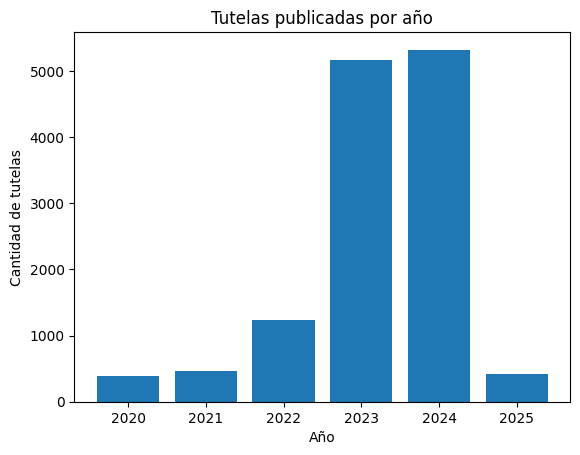

In [25]:
# Crear un gráfico de barras
plt.bar(tutelas_por_anio['anio_publicacion'], tutelas_por_anio['cantidad_tutelas'])
plt.xlabel('Año')
plt.ylabel('Cantidad de tutelas')
plt.title('Tutelas publicadas por año')
plt.show()

## 7.2 tipo de expedientes estudiados por año

In [29]:
#Generar un DF con año (fecha de publicacion), tipo de expedientes y total
expedientes_por_anio = df.groupby([df['fechaPubli'].dt.year, 'ExpedienteTipo']).size().reset_index(name='cantidad')
print(expedientes_por_anio)

    fechaPubli                           ExpedienteTipo  cantidad
0       2020.0                       Acciones de Tutela       365
1       2020.0                Conflictos de Competencia       114
2       2020.0          Conflictos entre Jurisdicciones        19
3       2020.0                    Decretos Legislativos       145
4       2020.0                      Demandas Ordinarias       169
5       2020.0           Leyes Aprobatorias de Tratados         1
6       2020.0               Objeciones Gubernamentales         4
7       2021.0                       Acciones de Tutela       450
8       2021.0                Conflictos de Competencia       147
9       2021.0          Conflictos entre Jurisdicciones       321
10      2021.0                    Decretos Legislativos        17
11      2021.0                      Demandas Ordinarias       283
12      2021.0           Leyes Aprobatorias de Tratados         6
13      2021.0               Objeciones Gubernamentales         3
14      20

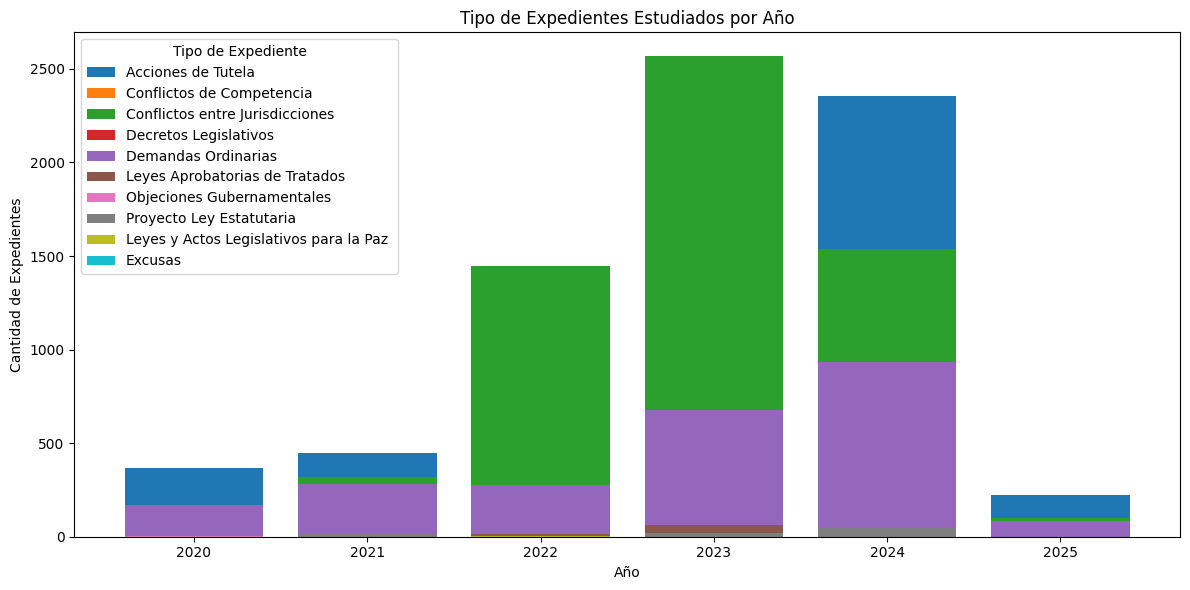

In [30]:
# prompt: genere grafico de barras de tipo de expedientes (ExpedienteTipo) estudiados por año, TOMANDO COMO BASE EL CODIGO:
# expedientes_por_anio = df.groupby([df['fechaPubli'].dt.year, 'ExpedienteTipo']).size().reset_index(name='cantidad')

import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(12, 6))  # AJUSTAR AL MEJOR TAMAÑO

for tipo in expedientes_por_anio['ExpedienteTipo'].unique():
    subset = expedientes_por_anio[expedientes_por_anio['ExpedienteTipo'] == tipo]
    plt.bar(subset['fechaPubli'], subset['cantidad'], label=tipo)

plt.xlabel('Año')
plt.ylabel('Cantidad de Expedientes')
plt.title('Tipo de Expedientes Estudiados por Año')
plt.xticks(expedientes_por_anio['fechaPubli'].unique())  # Ensure all years are shown on the x-axis
plt.legend(title='Tipo de Expediente')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
# Crear un gráfico de barras
plt.bar(tutelas_por_anio['anio_publicacion'], tutelas_por_anio['cantidad_tutelas'])
plt.xlabel('Año')
plt.ylabel('Cantidad de tutelas')
plt.title('Tutelas publicadas por año')
plt.show()

## 7.3 Demandas de constitucionalidad por año

In [ ]:
# Filtrar por 'Constitucionalidad'
df_constitucionalidad = df[df['Clasificacion'] == 'Constitucionalidad']
# Agrupar por año y contar las demandas
demandas_por_anio = df_constitucionalidad.groupby(df_constitucionalidad['fechaPubli'].dt.year).size().reset_index(name='cantidad_demandas')
print(demandas_por_anio)

In [ ]:
# prompt: generar grafico de barras de "Clasificacion"  por año,  pero filtrando solo los que sean de "Constitucionalidad"

# Filtrar por 'Constitucionalidad'
df_constitucionalidad = df[df['Clasificacion'] == 'Constitucionalidad']



# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(demandas_por_anio['fechaPubli'], demandas_por_anio['cantidad_demandas'])
plt.xlabel('Año')
plt.ylabel('Cantidad de Demandas')
plt.title('Demandas de Constitucionalidad por Año')
plt.xticks(demandas_por_anio['fechaPubli'].unique())
plt.show()
